<h1>Dimensionality Reduction Algorithms</h1>

<h3>Research and Hands On for Seminar - Presented by Rishav 201840501</h3>

<h2>Backward Elimination Algorithm</h2>

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import feature_importances

In [11]:
# Loading IRIS Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [12]:
# geberating estimator using logistic regression for RFE
estimator = LogisticRegression(max_iter=150)

#performing RFE
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X, y)
X_selected = selector.transform(X)

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  3.5  1.4  0.2
1  3.0  1.4  0.2
2  3.2  1.3  0.2
3  3.1  1.5  0.2
4  3.6  1.4  0.2



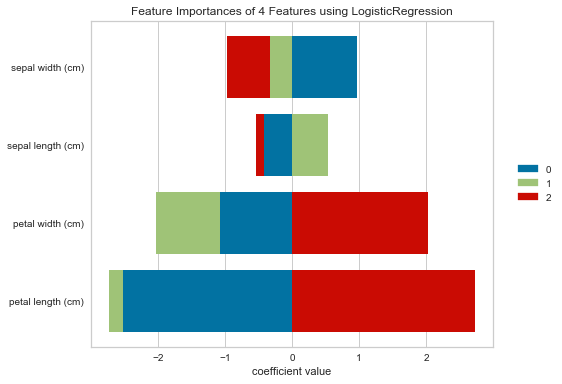

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd39516acd0>,
                   colormap=None, colors=None,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=150,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   is_fitted='auto',
                   labels=['sepal length (cm)', 'sepal width (cm)',
                           'petal length (cm)', 'petal width (cm)'],
                   relative=False, stack

In [13]:
print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(X_selected).head())
print()
print(feature_importances(estimator, X, y, stack=True,labels=iris.feature_names, relative=False))

**Observation**

From the output, we can see that the recursive feature elimination (RFE) algorithm has eliminated the sepal length from the logistic regression model. sepal length is the least important feature. The remaining features contain the original values as in the initial dataset. 

As the plot shows, it is better to keep the other 3 features in the model.

<h2>Forward Selection Algorithm</h2>

In [14]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [15]:
# Loading IRIS Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
#Selecting feature based on f_classif score
X_selected = SelectKBest(f_classif, k=3).fit_transform(X, y)

# Let's see F-vlues for each feature
print('F-values: ', f_classif(X,y)[0])
print()
print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(X_selected).head())

F-values:  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2


**Observation**

From the output, we can see that the forward feature selection process has selected the sepal length, petal length and petal width which have higher F-values.

<h2>Random Forests Algorithm</h2>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Loading IRIS Dataset
iris = load_iris()
X = iris.data
y = iris.target

Feature importances:  [0.08540008 0.01123495 0.45846811 0.44489686]
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Visualizing Important Features')

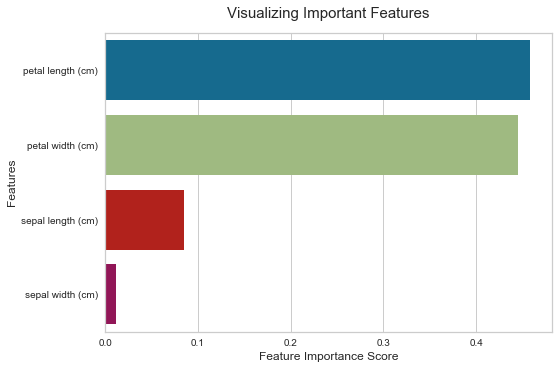

In [5]:
#Random forest classification
rf = RandomForestClassifier(n_estimators=100, max_depth=3, bootstrap=True, n_jobs=-1, random_state=0)
rf.fit(X, y)

feature_imp = pd.Series(rf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

print('Feature importances: ', rf.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

**Observation**

By looking at the feature importance, we can decide to drop the sepal width (cm) feature because it does not contribute enough for making the model

**Testing our observation on Random Forest Classifier by using Sckit-Learn SelectFromModel**

In [7]:
from sklearn.feature_selection import SelectFromModel

# SelectFromModel accepts a threshold parameter and will select
# the features whose importance (defined by the coefficients) are above this threshold.
selector = SelectFromModel(rf, threshold=0.05)
features_important = selector.fit_transform(X, y)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(features_important).head())

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2


The values returned by **SelectFromModel** can be used as the new input X for the Random Forest Classifier which is now trained only on the selected features

Feature importances:  [0.18127352 0.45474764 0.36397884]
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Visualizing Important Features')

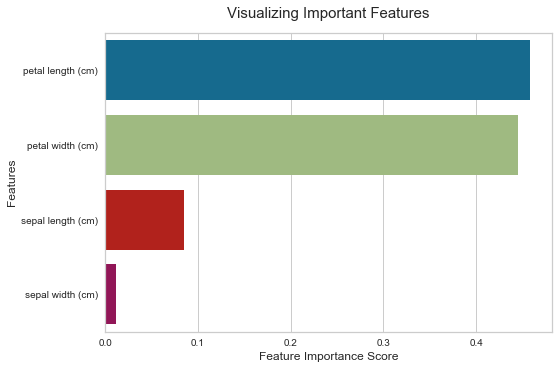

In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                           bootstrap=True, n_jobs=-1, random_state=0)

rf.fit(features_important, y)

#feature_imp = pd.Series(rf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

print('Feature importances: ', rf.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

**Observation**

We can see that both the graphs are same hence concluding we can drop sepal length

<h2>PCA for Data Visualization</h2>

In [11]:
# Another method to load iris dataset to pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [21]:
# Standardizing the data, i.e, N(0, 1)
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

print(tabulate(x[:5], features, tablefmt="fancy_grid"))

╒════════════════╤═══════════════╤════════════════╤═══════════════╕
│   sepal length │   sepal width │   petal length │   petal width │
╞════════════════╪═══════════════╪════════════════╪═══════════════╡
│      -0.900681 │      1.03206  │       -1.34127 │      -1.31298 │
├────────────────┼───────────────┼────────────────┼───────────────┤
│      -1.14302  │     -0.124958 │       -1.34127 │      -1.31298 │
├────────────────┼───────────────┼────────────────┼───────────────┤
│      -1.38535  │      0.337848 │       -1.39814 │      -1.31298 │
├────────────────┼───────────────┼────────────────┼───────────────┤
│      -1.50652  │      0.106445 │       -1.28441 │      -1.31298 │
├────────────────┼───────────────┼────────────────┼───────────────┤
│      -1.02185  │      1.26346  │       -1.34127 │      -1.31298 │
╘════════════════╧═══════════════╧════════════════╧═══════════════╛


In [26]:
# Projection to 2D
from sklearn.decomposition import PCA

# n_components = 2, i.e, two main dimensions of the variation
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf_numpy = principalDf.to_numpy()
print(tabulate(principalDf_numpy[:5], ['principal component 1', 'principal component 2'], tablefmt="fancy_grid"))

╒═════════════════════════╤═════════════════════════╕
│   principal component 1 │   principal component 2 │
╞═════════════════════════╪═════════════════════════╡
│                -2.26454 │                0.505704 │
├─────────────────────────┼─────────────────────────┤
│                -2.08643 │               -0.655405 │
├─────────────────────────┼─────────────────────────┤
│                -2.36795 │               -0.318477 │
├─────────────────────────┼─────────────────────────┤
│                -2.3042  │               -0.575368 │
├─────────────────────────┼─────────────────────────┤
│                -2.38878 │                0.674767 │
╘═════════════════════════╧═════════════════════════╛


In [32]:
# adding target to dataframe
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

finalDf_numpy = finalDf.to_numpy()
print(tabulate(finalDf_numpy[:10], 
               ['principal component 1', 'principal component 2', 'target'], 
               tablefmt="fancy_grid"))
print()
print(tabulate(finalDf_numpy[140:], 
               ['principal component 1', 'principal component 2', 'target'], 
               tablefmt="fancy_grid"))

╒═════════════════════════╤═════════════════════════╤═════════════╕
│   principal component 1 │   principal component 2 │ target      │
╞═════════════════════════╪═════════════════════════╪═════════════╡
│                -2.26454 │               0.505704  │ Iris-setosa │
├─────────────────────────┼─────────────────────────┼─────────────┤
│                -2.08643 │              -0.655405  │ Iris-setosa │
├─────────────────────────┼─────────────────────────┼─────────────┤
│                -2.36795 │              -0.318477  │ Iris-setosa │
├─────────────────────────┼─────────────────────────┼─────────────┤
│                -2.3042  │              -0.575368  │ Iris-setosa │
├─────────────────────────┼─────────────────────────┼─────────────┤
│                -2.38878 │               0.674767  │ Iris-setosa │
├─────────────────────────┼─────────────────────────┼─────────────┤
│                -2.07054 │               1.51855   │ Iris-setosa │
├─────────────────────────┼─────────────────────

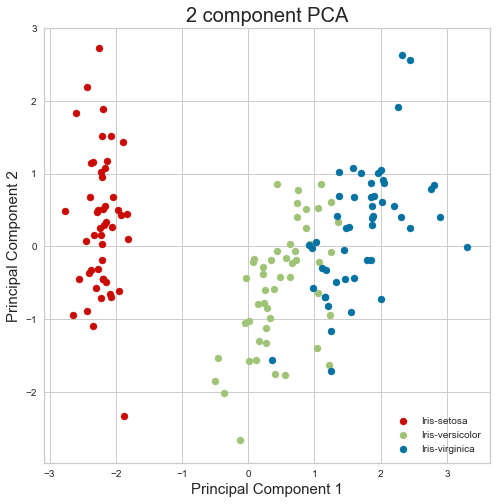

In [40]:
# Visualizing 2D projection
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
   indicesToKeep = finalDf['target'] == target
   ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
              , finalDf.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50)
    
ax.legend(targets)
ax.grid()

plt.grid()
plt.show()

In [42]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

**Observation**

The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information. Remaining information is compromised